## Basic setup.

In [15]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
import pandas as pd
import numpy as np
from datetime import datetime

df_city = pd.read_csv("data/city_data.csv") # Columns: city, driver_count, type
df_rides = pd.read_csv("data/ride_data.csv") # Columns: city, date, fare, ride_id

## Thinking through how I want to set up the data.

These are the metrics we want:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

As a result, this is the merged dataset we need:
* from `df_city`: city (I confirmed it's distinct: df_city['city'].count()` vs. `df_city['city'].nunique()`.)
* from `df_ride`: sum(fare)
* from `df_ride`: count(ride_id)  (I confirmed it's distinct: `df_rides['ride_id'].count()` vs. `df_rides['ride_id'].nunique()`)
* from `df_city`: driver_count
* from `df_city`: type

In [4]:
# Strip rides `date` column of timestamp.
df_rides['date'] = df_rides['date'].str.slice(0,10)

# Aggregate rides data by city and date.
df_rides_summary = df_rides.groupby('city').agg({'ride_id': pd.Series.nunique,'fare':'sum'}).reset_index()
# If we wanted both city and date grouping: df_rides_summary = df_rides.groupby(['city','date']).agg({'ride_id': pd.Series.nunique,'fare':'sum'}).reset_index()
df_rides_summary.head()

# Merge city data and aggregated ride data.
df = pd.merge(df_rides_summary, df_city, on="city")

# Rename columns.
df = df.rename(columns={'ride_id':'ride_count','fare':'total_fares'})

# Add average fare per city column.
df['avg_fare'] = df['total_fares'] / df['ride_count']

# CANNOT format currency columns as it breaks the bubble chart.
# df['avg_fare'] = df['avg_fare'].map("${:.2f}".format)
# df['total_fares'] = df['total_fares'].map("${:.2f}".format)

# Show resulting dataset.
df.head()

# Manually confirmed by comparing to Excel data that ride count is accurate: df['ride_count'].sum()
# Manually confirmed by comparing to Excel data that  city count is accurate: df['city'].nunique()
# Manually confirmed by comparing to Excel data that  total fare sum is right (prior to re-formatting currency values): df['total_fares'].sum()



,city,ride_count,total_fares,driver_count,type,avg_fare
0,Amandaburgh,18,443.55,12,Urban,24.641667
1,Barajasview,22,557.31,26,Urban,25.332273
2,Barronchester,16,582.76,11,Suburban,36.422500
3,Bethanyland,18,593.21,22,Suburban,32.956111
4,Bradshawfurt,10,400.64,7,Rural,40.064000


## Bubble Plot of Ride Sharing Data

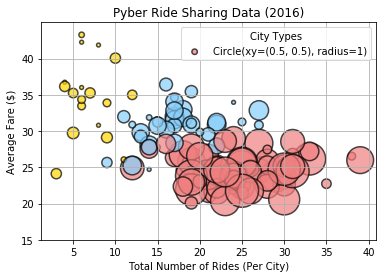

In [38]:
# This is what the final result should look like: http://cld.wthms.co/kixqQa/7wsckAseie

# Clear anything created before.
plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

# Create plot.
colors = df.type.map({'Urban':'lightcoral', 'Suburban':'lightskyblue', 'Rural':'gold'})
plt.scatter(x = df['ride_count'], y = df['avg_fare'], s = df['driver_count']*15, c = colors, alpha=0.7 , edgecolor='black', linewidths=1.5)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylim([15, 45])
plt.yticks(np.arange(15, 45, 5))

# TUTOR: Is there a way to set the legend without adding another column in the dataframe?
# Without the use of patchList or Line2D?

types = ['Urban','Suburban','Rural']
legend_elements = [ptc.Circle((0.5, 0.5), 1, facecolor=colors[i], linewidth=3) for i in range(len(types))]
lgnd = plt.legend(legend_elements,loc='upper right', title='City Types')
lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]

plt.grid()

## Total Fares by City Type

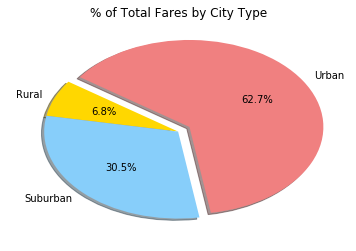

In [239]:
# This is what the chart should look like: https://cld.wthms.co/75D5Dx/wwbA5pv6qz.


# Clear anything created before.
plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

# Create chart.
df_city_type_fares = df.groupby('type').agg({'total_fares':'sum'}).reset_index()
colors = ['gold','lightskyblue','lightcoral']
explode = (0, 0, 0.1)
plt.pie(df_city_type_fares['total_fares'],labels=df_city_type_fares['type'],autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=145, radius=1,)
plt.title("% of Total Fares by City Type")
plt.show()

## Total Rides by City Type

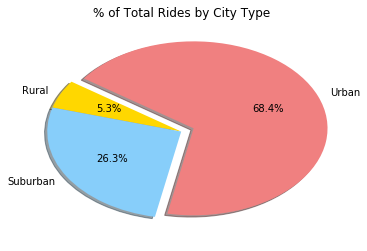

In [240]:
# This is what the chart should look like: https://cld.wthms.co/maGPqC/WaZL7Hk65n.

# Clear anything created before.
plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

# Create chart.
df_city_type_rides = df.groupby('type').agg({'ride_count':'sum'}).reset_index()
colors = [ 'gold','lightskyblue','lightcoral']
explode = (0, 0, 0.1)
plt.pie(df_city_type_rides['ride_count'],labels=df_city_type_rides['type'],autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=145, radius=1,)
plt.title("% of Total Rides by City Type")
plt.show()

## Total Drivers by City Type

In [241]:
df_city.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


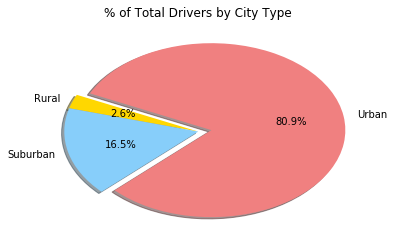

In [242]:
# This is what the chart should look like: https://cld.wthms.co/maGPqC/WaZL7Hk65n.

# Clear anything created before.
plt.cla()   # Clear axis
plt.clf()   # Clear figure
plt.close() # Close a figure window

# Create chart.
df_city_type_drivers = df.groupby('type').agg({'driver_count':'sum'}).reset_index()
df_city_type_drivers.head()

colors = [ 'gold','lightskyblue','lightcoral']
explode = (0, 0, 0.1)
plt.pie(df_city_type_drivers['driver_count'],labels=df_city_type_drivers['type'],autopct='%1.1f%%', colors=colors, explode=explode, shadow=True, startangle=155, radius=1,)
plt.title("% of Total Drivers by City Type")
plt.show()

## Three Trends

1) In terms of workload, rural drivers are busiest (avg. rides per driver) while urban drivers are least busy (spend the most time not driving, bu waiting to drive).

2) Similarly, the value of a ride is higher in rural areas; this makes sense given that distances traveled are likely longer.

3) Overall trend: the greatest opportunity lies in rural cities.

In [258]:
df_type_summary = df.groupby('type').agg({'total_fares':'sum','ride_count':'sum','driver_count':'sum'}).reset_index()
df_type_summary['avg_fare_per_ride'] = df_type_summary['total_fares'] / df_type_summary['ride_count']
df_type_summary['rides_per_driver'] = df_type_summary['ride_count'] / df_type_summary['driver_count']

# TUTOR: Why does this not work?
driver_pct = (df_type_summary.driver_count.value_counts(normalize=True)*100).map("{:.1f}%".format)
print(df_type_summary.driver_count.value_counts())

df_type_summary['total_fares'] = df_type_summary['total_fares'].map("${:.2f}".format)
df_type_summary['avg_fare_per_ride'] = df_type_summary['avg_fare_per_ride'].map("${:.2f}".format)
df_type_summary

490     1
78      1
2405    1
Name: driver_count, dtype: int64


,type,total_fares,ride_count,driver_count,avg_fare_per_ride,rides_per_driver
0,Rural,$4327.93,125,78,$34.62,1.602564
1,Suburban,$19356.33,625,490,$30.97,1.275510
2,Urban,$39854.38,1625,2405,$24.53,0.675676
